In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau, entropy
import os

sns.set_style('white')
sns.set_context('notebook')

## Network

In [79]:
#
algo = "relu_regressor"
dataset = "mnist"


path = f'./varying_data_results/{dataset}/irms/'
irms = []
for f in sorted(os.listdir(path)):
    if algo in f:
        irms.append(np.load(path + f))

# Read
df = pd.read_csv(f'./varying_data_results/{dataset}/{dataset}_{algo}_results.csv')

# Define headers
metric = "01_error"
train_error = f'train_{metric}'
test_error = f'test_{metric}'

# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df["IRM_cols_mean_L1"] = df["IRM_cols_mean_L1"] / df["n_train_samples"]
df["IRM_cols_mean_L2"] = df["IRM_cols_mean_L2"] / df["n_train_samples"]
df['IRM_L1'] = df["IRM_L1"] / df["n_train_samples"]

df['IRM_rows_mean_L2_normalized'] = df['IRM_rows_mean_L2'] / np.sqrt(df['width'])*df['IRM_L1']

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'hidden_layer_dims', 'n_epochs', 'shuffle_label_frac'],
#     as_index=False,
# ).mean()
# df['n_parameters'] = df['n_parameters'].astype(int)

df.head(5)

,model,rep,n_train_samples,n_test_samples,save_path,onehot,shuffle_label_frac,hidden_layer_dims,n_epochs,learning_rate,...,IRM_cols_mean_L1,IRM_cols_mean_L2,IRM_mean_dot_product,IRM_mean_sim_entropy,n_parameters,depth,width,weights_L2,generalization_gap,IRM_rows_mean_L2_normalized
0,relu_regressor,0.0,1000.0,10000.0,/mnt/ssd3/ronan/pytorch,1.0,0.0,100.0,1000.0,0.01,...,0.15763,0.005178,52.83339,6.808057,79510.0,1.0,100.0,13.433325,0.1237,0.036232
1,relu_regressor,1.0,1000.0,10000.0,/mnt/ssd3/ronan/pytorch,1.0,0.0,100.0,1000.0,0.01,...,0.17141,0.005633,63.06167,6.827265,79510.0,1.0,100.0,13.444984,0.1299,0.043045
2,relu_regressor,2.0,1000.0,10000.0,/mnt/ssd3/ronan/pytorch,1.0,0.0,100.0,1000.0,0.01,...,0.23810,0.007736,101.10734,6.861958,79510.0,1.0,100.0,13.398042,0.1275,0.075710
3,relu_regressor,3.0,1000.0,10000.0,/mnt/ssd3/ronan/pytorch,1.0,0.0,100.0,1000.0,0.01,...,0.22403,0.007255,87.49447,6.854638,79510.0,1.0,100.0,13.424459,0.1361,0.066267
4,relu_regressor,4.0,1000.0,10000.0,/mnt/ssd3/ronan/pytorch,1.0,0.0,100.0,1000.0,0.01,...,0.21283,0.006929,67.71923,6.798824,79510.0,1.0,100.0,13.396402,0.1332,0.055385


In [76]:
# Ms = [M @ M.T / M.shape[1] for M in irms]
row_entropy = [np.linalg.norm(np.mean(irm, axis=0)) for irm in irms]

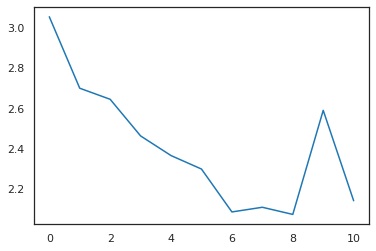

In [77]:
plt.plot(np.arange(len(Ms)), row_entropy)
plt.show()

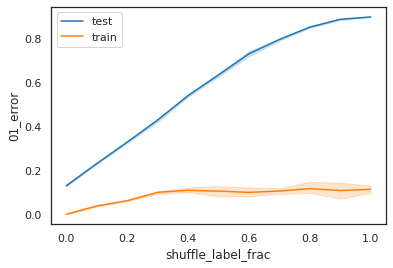

In [80]:
plot_df = df
x_var = 'shuffle_label_frac'

fig, ax = plt.subplots(1, 1, sharex=True)

sns.lineplot(
    data=df, x=x_var, y=test_error,
    ax=ax, label='test')
sns.lineplot(
    data=df, x=x_var, y=train_error,
    ax=ax, label='train')

plt.ylabel(metric)
plt.legend()
plt.show()

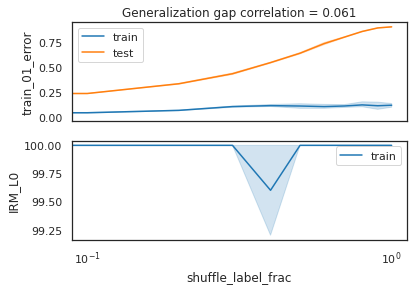

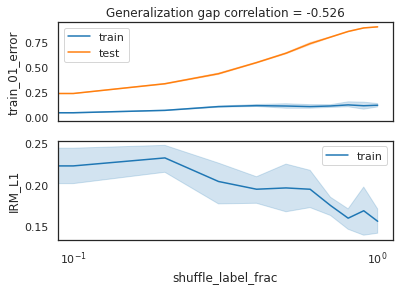

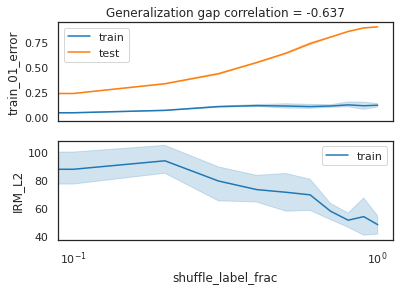

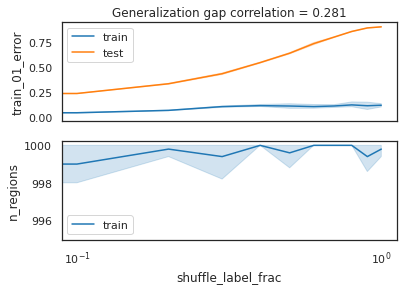

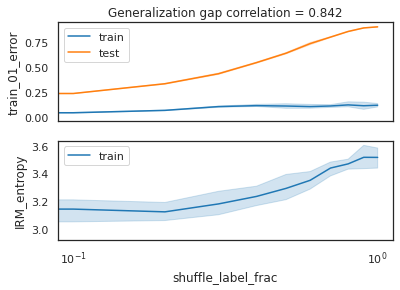

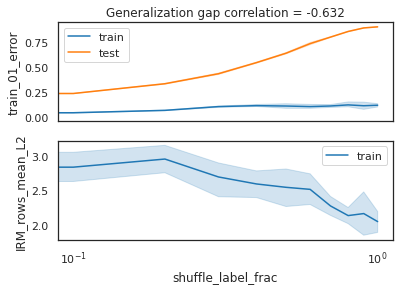

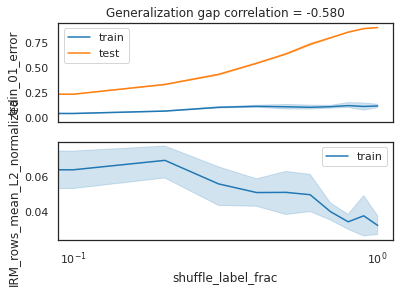

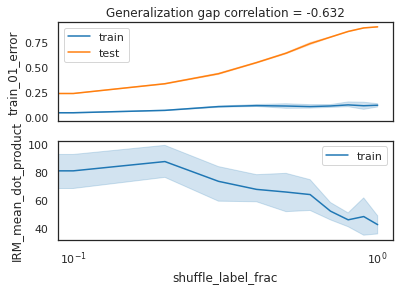

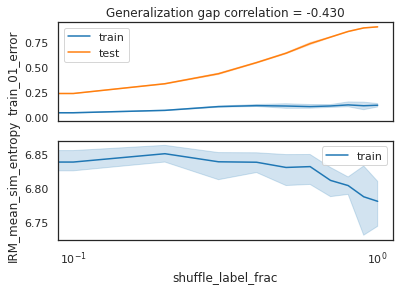

In [81]:
plot_vars = [
    'IRM_L0', 'IRM_L1', 'IRM_L2', 'n_regions',
    'IRM_entropy',
    'IRM_rows_mean_L2',
    'IRM_rows_mean_L2_normalized',
    'IRM_mean_dot_product', 'IRM_mean_sim_entropy',
]

for var in plot_vars:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
            
    sns.lineplot(
        data=plot_df, x=x_var, y=train_error,
        ax=ax1, label='train')
    sns.lineplot(
        data=plot_df, x=x_var, y=test_error,
        ax=ax1, label='test')
    sns.lineplot(
        data=plot_df, x=x_var, y=var,
        ax=ax2, label='train')

    plt.xscale('log')

    corr, _ = spearmanr(df['generalization_gap'], df[var])
    ax1.set_title(f'Generalization gap correlation = {corr:.3f}')
    plt.legend()
    plt.show()

## Forest

In [50]:
#
algo = "forest"
dataset = "xor"

# Read
df = pd.read_csv(f'./varying_data_results/{dataset}/{dataset}_{algo}_results.csv')


# Define headers
metric = "mse"
train_error = f'train_{metric}'
test_error = f'test_{metric}'

# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df["IRM_cols_mean_L1"] = df["IRM_cols_mean_L1"] / df["n_train_samples"]
df["IRM_cols_mean_L2"] = df["IRM_cols_mean_L2"] / df["n_train_samples"]
df['IRM_L1'] = df["IRM_L1"] / df["n_train_samples"]


# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'max_depth', 'n_estimators', 'shuffle_label_frac'],
#     as_index=False,
# ).mean()

df.head(5)

,model,rep,n_train_samples,n_test_samples,recurse_level,cov_scale,onehot,shuffle_label_frac,n_estimators,bootstrap,...,IRM_h*,ACTS_h*,IRM_entropy,IRM_rows_mean_L2,IRM_cols_mean_L1,IRM_cols_mean_L2,IRM_mean_dot_product,IRM_mean_sim_entropy,n_total_leaves,generalization_gap
0,forest,0.0,1024.0,8192.0,0.0,0.5,1.0,0.0,5.0,0.0,...,5.0,0.0,3.988631,0.448949,0.006165,0.000193,41.278516,2.977453,811.0,0.190713
1,forest,0.0,1024.0,8192.0,0.0,0.5,1.0,0.1,5.0,0.0,...,0.0,0.0,4.479252,0.338528,0.005128,0.000160,23.470312,2.548881,975.0,0.235283
2,forest,0.0,1024.0,8192.0,0.0,0.5,1.0,0.2,5.0,0.0,...,0.0,0.0,4.952143,0.245345,0.003897,0.000122,12.327734,2.039771,1283.0,0.295664
3,forest,0.0,1024.0,8192.0,0.0,0.5,1.0,0.3,5.0,0.0,...,0.0,0.0,5.198908,0.218772,0.003358,0.000105,9.801953,1.822396,1489.0,0.344648
4,forest,0.0,1024.0,8192.0,0.0,0.5,1.0,0.4,5.0,0.0,...,0.0,0.0,5.389410,0.181499,0.003123,0.000098,6.746484,1.602960,1601.0,0.388496


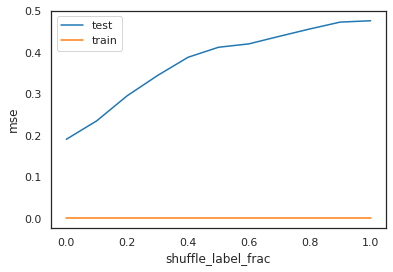

In [51]:
plot_df = df
x_var = 'shuffle_label_frac'

fig, ax = plt.subplots(1, 1, sharex=True)

sns.lineplot(
    data=df, x=x_var, y=test_error,
    ax=ax, label='test')
sns.lineplot(
    data=df, x=x_var, y=train_error,
    ax=ax, label='train')

plt.ylabel(metric)
plt.legend()
plt.show()

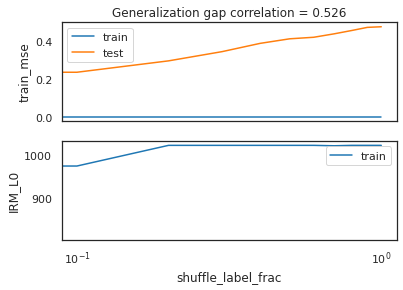

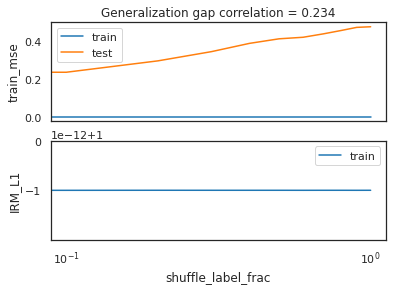

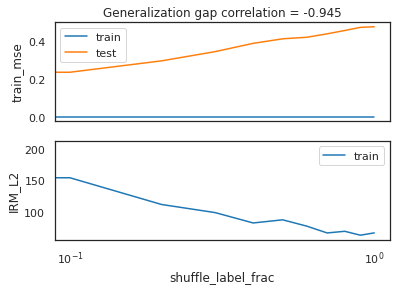

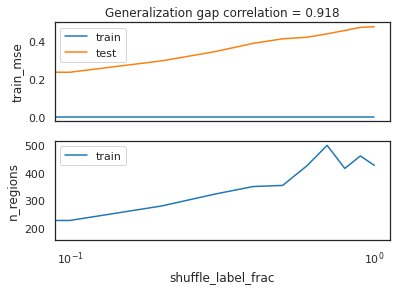

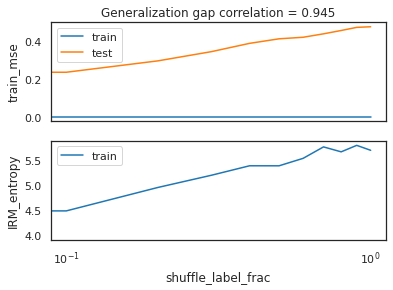

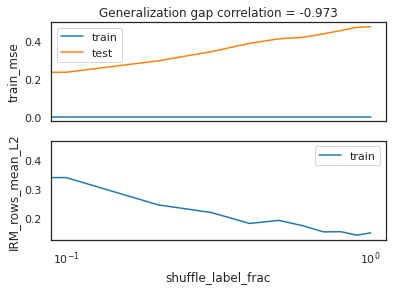

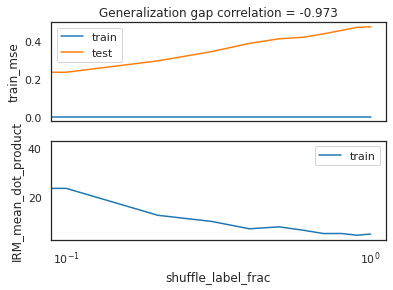

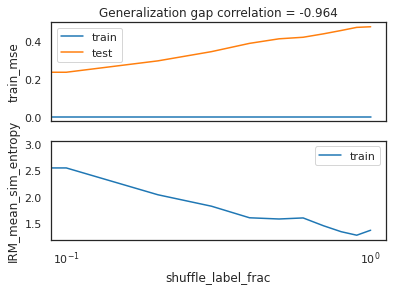

In [52]:
plot_vars = [
    'IRM_L0', 'IRM_L1', 'IRM_L2', 'n_regions',
    'IRM_entropy',
    'IRM_rows_mean_L2',
    'IRM_mean_dot_product', 'IRM_mean_sim_entropy',
]

for var in plot_vars:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
            
    sns.lineplot(
        data=plot_df, x=x_var, y=train_error,
        ax=ax1, label='train')
    sns.lineplot(
        data=plot_df, x=x_var, y=test_error,
        ax=ax1, label='test')
    sns.lineplot(
        data=plot_df, x=x_var, y=var,
        ax=ax2, label='train')

    plt.xscale('log')

    corr, _ = spearmanr(df['generalization_gap'], df[var])
    ax1.set_title(f'Generalization gap correlation = {corr:.3f}')
    plt.legend()
    plt.show()